****************************************************************************************** 

**** data shape:****  (731, 16)
****************************************************************************************** 

*** Data Info: ****

****************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null 

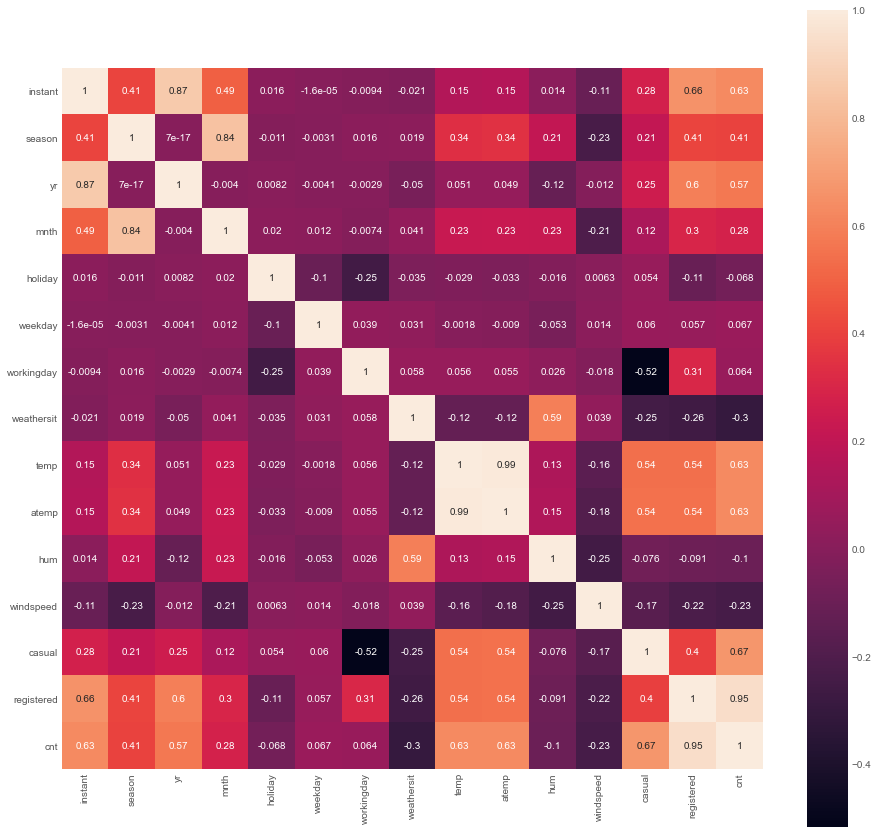

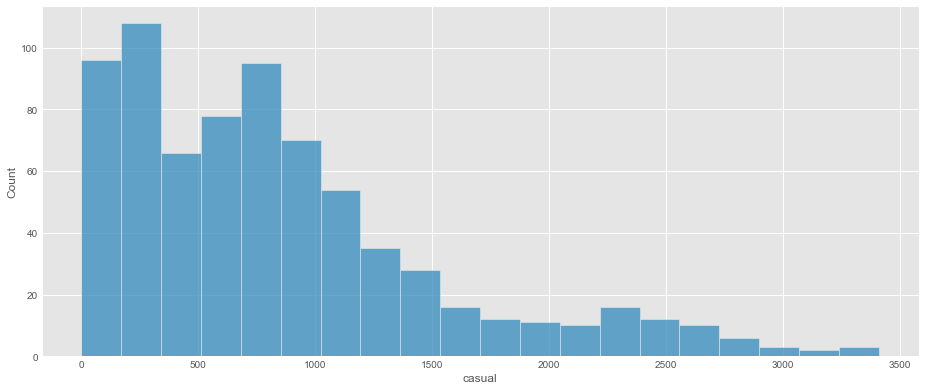

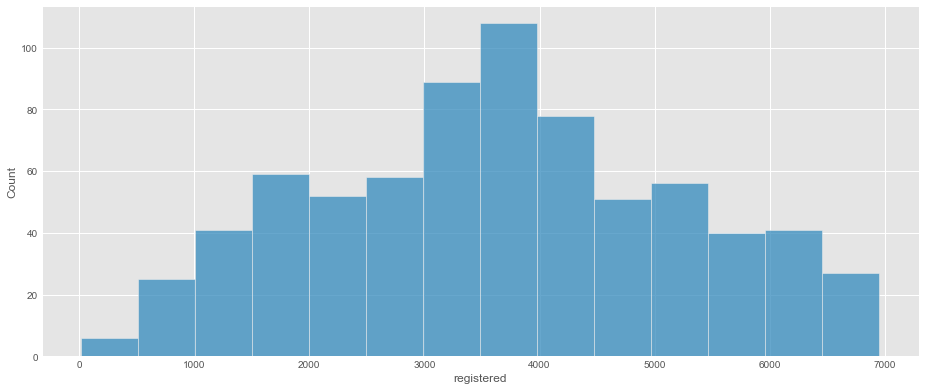

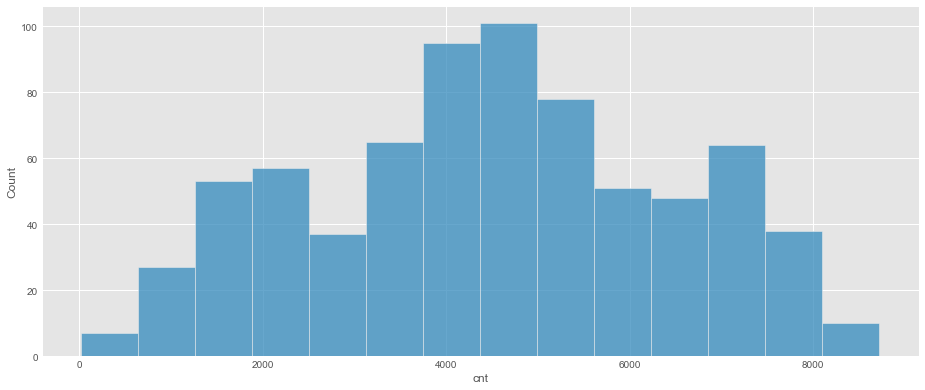

columns with dummies Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    float64
 1   mnth          731 non-null    float64
 2   holiday       731 non-null    int64  
 3   weekday       731 non-null    int64  
 4   workingday    731 non-null    int64  
 5   temp          731 non-null    float64
 6   atemp         731 non-null    float64
 7   hum           731 non-null    float64
 8   windspeed     731 non-null    float64
 9   cnt           731 non-null    int64  
 10  season_1      731 non-null    uint8  
 11  season_2      731 non-nu

In [10]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
plt.style.use("ggplot")
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score


from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
                  
######################################################################################################################
#  read Csv giving info Shape Head Describe 
######################################################################################################################
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
data1= pd.read_csv("bike_rentals.csv",encoding="ISO-8859-1")


print("*"*90,'\n')
print('**** data shape:**** ',data1.shape)
print("*"*90,'\n')
print('*** Data Info: ****\n')
print("*"*90,'\n')
print(data1.info(),'\n')
print("*"*90,'\n')
print('*** Data head: ****\n')
print("*"*90,'\n')
print(data1.head(),'\n')
print("*"*90,'\n')
print('*** data describe: ****\n')
print("*"*90,'\n')
print(data1.describe(),'\n')
print("*"*90,'\n')


# *******************    # description Function    *********************************************************

def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary
print(description(data1))
print("*"*90,'\n')

# *****************************    # Nbr Duplicate Value    *********************************************************

print('Entrées dupliquées: {}'.format(data1.duplicated().sum()))
print("*"*90)
# *****************************  Corellation     **********************************************************************
fig = plt.figure(figsize=[14,14]) #Heat map
ax = sns.heatmap(data1.corr(),annot=True,square=True)
plt.show()
######################################################################################################################
#                         Plootting
######################################################################################################################
# Function hist_plot
# ==================

def hist_plot(columns):
    for col in columns:
        plt.figure(figsize=(14,6))
        sns.histplot(data1[col]) # distribution
        plt.show
hist_plot(['casual', 'registered', 'cnt'])
plt.show()


######################################################################################################################
#                         Missing Value with fillna & Remove Outliers
######################################################################################################################
# fillna with Mean
# ==================

data1['yr']=data1['yr'].fillna(data1['yr'].mean())
data1['mnth']=data1['mnth'].fillna(data1['mnth'].mean())
data1['temp']=data1['temp'].fillna(data1['temp'].mean())
data1['atemp']=data1['atemp'].fillna(data1['atemp'].mean())
data1['hum']=data1['hum'].fillna(data1['hum'].mean())
data1['windspeed']=data1['windspeed'].fillna(data1['windspeed'].mean())

# Remove Outliers
# ==================
data1 =data1[np.abs(data1["cnt"]-data1["cnt"].mean())<=(3*data1["cnt"].std())] 

# Replace with Dummies
# ====================
data1 = pd.get_dummies(data1, columns=['season', 'weathersit'])
print('columns with dummies',data1.columns)

######################################################################################################################
#                         Train & Test Set
######################################################################################################################
# cnt= casual+ registered So We Drop casual,registered
# ====================================================

drop_columns = ['instant','dteday','casual','registered']
data1.drop(drop_columns, axis=1,inplace=True) 
data1.info()    
X = data1.drop(columns=['cnt'])
y = data1['cnt']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.35, random_state=21)
######################################################################################################################
#                         Imput &Scaling  Data
######################################################################################################################
num_vars = ['cnt','temp','atemp','hum','windspeed']
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


######################################################################################################################
#                          Ridge& & Lasso Algorithm
######################################################################################################################
print("*"*90)
# Ridge  Algorithm
# ==============

#Using Best parameter from GriSearch  c=0.4
# Instantiate ridge regression 
r_reg = Ridge(fit_intercept=False,alpha=0.4)
# Fit it to the data
r_reg.fit(X, y)
accuracy = r_reg.score(X_test, y_test)    
print('Score Test Ridge  {:.3f}'.format(accuracy))
print("*"*90)

# Lasso  Algorithm
# ==============

# Instantiate  regression 
L_reg = Lasso(fit_intercept=False,alpha=0.4)
# Fit it to the data
L_reg.fit(X, y)
accuracy = L_reg.score(X_test, y_test)    
print('Score Test Lasso  {:.3f}'.format(accuracy))
print("*"*90)



######################################################################################################################
#                          AdaBoostRegressor Algorithm
######################################################################################################################
xg = AdaBoostRegressor(learning_rate=0.3, n_estimators = 200)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
#xg_mse = mean_squared_error(X_test, y_test)
y_pred = xg.predict(X_test)
y_pred_Train = xg.predict(X_train)
acc_train = xg.score(X_train, y_train) 
acc_test = xg.score(X_test, y_test)
print('train  accuracy of   AdaBoostRegressor:{:.2f}'.format(acc_train)) 
print('Test set accuracy ofAdaBoostRegressor :{:.2f}'.format(acc_test)) 
#print("mean_squared_error",round(np.sqrt(xg_mse), 3))
print("*"*90)
######################################################################################################################
#                          GradientBoostingClassifier Algorithm
######################################################################################################################

gbm_model = GradientBoostingRegressor(learning_rate=0.05, n_estimators = 200,max_depth=2) 
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
y_pred_Train = gbm_model.predict(X_train)
acc_train = gbm_model.score(X_train, y_train) 
acc_test = gbm_model.score(X_test, y_test)
print('train  accuracy of   GradientBoostingRegressor:{:.2f}'.format(acc_train)) 
print('Test set accuracy GradientBoostingRegressor :{:.2f}'.format(acc_test)) 
print("*"*40)


